<a href="https://colab.research.google.com/github/gks4478/section1/blob/main/AI_18_%ED%95%9C%EC%A7%84%ED%9D%AC_section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section1 project
**주제 : 다음 분기에 어떤 게임을 설계해야 할까**
파일 : https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv

> **[데이터 항목 내용]**

*   Name : 게임 이름
*   Platform : 게임이 지원되는 플랫폼 이름
*   Year : 게임 출시 연도
*   Genre : 게임 장르
*   Publisher : 게임을 배급한 회사
*   NA_Sales : 북미지역 출고량
*   EU_Sales : 유럽지역 출고량
*   항목 추가JP_Sales : 일본지역 출고량
*   Other_Sales : 기타지역 출고량




> **<순서>**

1.   EDA : year
2.   EDA : Genre
3.   EDA : Sales
4.   시각화 및 분석
















In [29]:
# 파일 불러오기
import pandas as pd
df = pd.read_csv('vgames2.csv')

In [30]:
# 데이터 프레임 앞에 불필요한 내용 삭제
df = df.drop(df.iloc[:,[0]], axis = 1)

# 1. EDA : year

1-1) 4자리수가 아닌 year의 value 값을 바꾼다.

In [31]:
# 4자리가 아닌 year를 찾는다.
# 값을 다르게 찾은 이유는 2000을 더할지 1900을 더할지 정해야 하기 때문이다.
# 예) 두자리 수인 year의 value값이 80이면 2000을 더하면 안되기 때문이다.
a = df.query('(Year > 0) and (Year <= 10)')['Year'].index
b = df.query('(Year > 10) and (Year <= 20)')['Year'].index
c = df.query('(Year > 80) and (Year <= 90)')['Year'].index
d = df.query('(Year > 90) and (Year <= 100)')['Year'].index
e = df.query('(Year == 0)')['Year'].index
df.Year.loc[a] = df.Year.loc[a] + 2000
df.Year.loc[b] = df.Year.loc[b] + 2000
df.Year.loc[c] = df.Year.loc[c] + 1900
df.Year.loc[d] = df.Year.loc[d] + 1900
df.Year.loc[e] = df.Year.loc[e] + 2000
# Disney's Aladdin :3이여서 2000을 더할까 했지만 찾아보니 1993년도에 나온 게임이었다.
df.Year.loc[8765] = 1993

<ipython-input-31-f7dcc3a03335>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Year.loc[a] = df.Year.loc[a] + 2000
<ipython-input-31-f7dcc3a03335>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Year.loc[b] = df.Year.loc[b] + 2000
<ipython-input-31-f7dcc3a03335>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Year.loc[c] = df.Year.loc[c] + 1900
<ipython-input-31-f7dcc3a03335>:12: SettingWithCopyWarning: 
A value is tryin

1-2) 동일한 제목을 가진 게임들의 출시일은 같다고 가정하고 → 결측치를 채운다.

In [32]:
# 제목별로 그룹화한 후 위의 값으로 결측치를 채운다.
df['Year'] = df.groupby('Name')['Year'].transform(lambda x: x.fillna(x.mean()))

1-3) 동일한 제목들이 모두 결측치인 value 채우기(그냥 drop 시켜도 되지만 147개이기 때문에 찾아서 채워본다)

In [33]:
# 직접 구글링해서 채워넣는다.
df.loc[31,'Year'] = 2007.0; df.loc[109,'Year'] = 2009.0; df.loc[273,"Year"] = 2012.0; df.loc[430,"Year"] = 1997.0
df.loc[818,"Year"] = 2001.0; df.loc[15805,"Year"] = 2009.0; df.loc[15897,"Year"] = 2004.0; df.loc[16053,"Year"] = 1982.0
df.loc[16130,"Year"] = 2012.0; df.loc[16425,"Year"] = 2011.0; df.loc[1011,'Year'] = 2002.0; df.loc[1235,'Year'] = 2009.0
df.loc[1301,'Year'] = 2013.0; df.loc[1509,'Year'] = 2010.0; df.loc[1523,'Year'] = 1996.0; df.loc[1534,'Year'] = 2009.0
df.loc[1796,'Year'] = 2013.0; df.loc[1884,'Year'] = 2001.0; df.loc[2062,'Year'] = 2009.0; df.loc[2270,'Year'] = 2004.0
df.loc[2527,'Year'] = 1980.0; df.loc[2545,'Year'] = 2006.0; df.loc[2824,'Year'] = 2001.0; df.loc[2934,'Year'] = 2006.0
df.loc[2970,'Year'] = 2006.0; df.loc[3031,'Year'] = 1997.0; df.loc[3135,'Year'] = 2002.0; df.loc[3184,'Year'] = 2000.0
df.loc[3187,'Year'] = 2007.0; df.loc[3238,'Year'] = 2006.0; df.loc[3533,'Year'] = 1998.0; df.loc[3562,'Year'] = 2005.0
df.loc[3605,'Year'] = 2011.0; df.loc[3639,'Year'] = 2015.0; df.loc[3811,'Year'] = 2006.0; df.loc[3942,'Year'] = 1999.0
df.loc[4181,'Year'] = 2007.0; df.loc[4196,'Year'] = 2011.0; df.loc[4230,'Year'] = 2006.0; df.loc[4308,'Year'] = 2011.0
df.loc[4497,'Year'] = 2011.0; df.loc[4511,'Year'] = 2010.0; df.loc[4521,'Year'] = 1989.0; df.loc[4617,'Year'] = 1978.0
df.loc[4714,'Year'] = 2009.0; df.loc[4865,'Year'] = 2012.0; df.loc[4911,'Year'] = 2011.0; df.loc[5055,'Year'] = 2005.0
df.loc[5144,'Year'] = 2010.0; df.loc[5230,'Year'] = 1980.0; df.loc[5720,'Year'] = 1980.0; df.loc[5728,'Year'] = 2003.0
df.loc[5994,'Year'] = 2005.0; df.loc[6152,'Year'] = 2008.0; df.loc[6209,'Year'] = 2006.0; df.loc[6257,'Year'] = 2005.0
df.loc[6288,'Year'] = 1978.0; df.loc[6318,'Year'] = 2009.0; df.loc[6375,'Year'] = 2009.0; df.loc[6575,'Year'] = 1980.0
df.loc[6623,'Year'] = 2005.0; df.loc[7686,'Year'] = 2005.0; df.loc[7713,'Year'] = 2009.0; df.loc[7774,'Year'] = 2009.0
df.loc[7792,'Year'] = 2007.0; df.loc[7847,'Year'] = 2005.0; df.loc[8055,'Year'] = 2009.0;df.loc[8244,'Year'] = 2006.0
df.loc[8350,'Year'] = 2002.0; df.loc[8422,'Year'] = 1999.0; df.loc[8470,'Year'] = 2011.0; df.loc[8525,'Year'] = 2011.0
df.loc[8546,'Year'] = 2010.0; df.loc[8638,'Year'] = 2012.0; df.loc[8812,'Year'] = 2005.0; df.loc[8849,'Year'] = 2009.0
df.loc[9016,'Year'] = 2008.0; df.loc[9082,'Year'] = 2010.0; df.loc[9184,'Year'] = 2009.0; df.loc[9640,'Year'] = 2003.0
df.loc[9684,'Year'] = 2008.0; df.loc[9920,'Year'] = 1978.0; df.loc[10084,'Year'] = 2008.0; df.loc[10092,'Year'] = 2000.0
df.loc[10094,'Year'] = 2009.0; df.loc[10156,'Year'] = 2004.0; df.loc[10324,'Year'] = 2011.0; df.loc[10431,'Year'] = 2000.0
df.loc[10534,'Year'] = 2009.0; df.loc[10776,'Year'] = 2007.0; df.loc[10841,'Year'] = 2012.0; df.loc[10896,'Year'] = 2004.0
df.loc[11125,'Year'] = 1980.0; df.loc[11193,'Year'] = 2006.0; df.loc[11309,'Year'] = 1998.0; df.loc[11316,'Year'] = 1977.0
df.loc[11386,'Year'] = 2002.0; df.loc[11584,'Year'] = 2006.0; df.loc[11658,'Year'] = 2011.0; df.loc[11711,'Year'] = 2014.0
df.loc[11754,'Year'] = 2011.0; df.loc[11764,'Year'] = 2009.0; df.loc[11837,'Year'] = 1979.0; df.loc[12111,'Year'] = 2010.0
df.loc[12307,'Year'] = 2012.0; df.loc[12355,'Year'] = 2010.0; df.loc[12390,'Year'] = 2004.0; df.loc[12417,'Year'] = 2008.0
df.loc[12536,'Year'] = 2004.0; df.loc[12616,'Year'] = 1978.0; df.loc[12703,'Year'] = 2008.0; df.loc[12799,'Year'] = 2003.0
df.loc[12858,'Year'] = 2007.0; df.loc[13162,'Year'] = 2011.0; df.loc[13187,'Year'] = 2010.0; df.loc[13190,'Year'] = 2011.0
df.loc[13256,'Year'] = 2011.0; df.loc[13327,'Year'] = 2001.0; df.loc[13357,'Year'] = 2011.0; df.loc[13406,'Year'] = 2010.0
df.loc[13450,'Year'] = 2007.0; df.loc[13589,'Year'] = 2008.0; df.loc[13628,'Year'] = 2004.0; df.loc[13656,'Year'] = 2010.0
df.loc[13766,'Year'] = 2007.0; df.loc[13889,'Year'] = 2003.0; df.loc[13902,'Year'] = 1977.0; df.loc[13902,'Year'] = 1977.0
df.loc[13923,'Year'] = 2009.0; df.loc[13954,'Year'] = 2016.0; df.loc[14012,'Year'] = 2004.0; df.loc[14049,'Year'] = 2007.0
df.loc[14050,'Year'] = 1978.0; df.loc[14119,'Year'] = 2004.0; df.loc[14292,'Year'] = 2006.0; df.loc[14585,'Year'] = 2002.0
df.loc[14622,'Year'] = 2008.0; df.loc[14765,'Year'] = 1977.0; df.loc[14911,'Year'] = 2008.0; df.loc[14941,'Year'] = 2010.0
df.loc[15013,'Year'] = 2008.0; df.loc[15051,'Year'] = 2008.0; df.loc[15063,'Year'] = 2003.0; df.loc[15093,'Year'] = 2003.0
df.loc[15216,'Year'] = 2002.0; df.loc[15411,'Year'] = 2011.0; df.loc[15669,'Year'] = 2004.0; df.loc[2408,'Year'] = 2007.0

1-4) Year의 항목의 EDA를 마치고 vgames2_year.csv 파일 저장

In [34]:
# Year 항목의 EDA를 마친 후 vgames2_year 파일에 저장한다.
df.to_csv("vgames2_year.csv", index = False)

# 2. EDA : Genre

In [35]:
# 파일 불러오기 (vgames2_year를 불러온다)
df = pd.read_csv('vgames2_year.csv')

In [36]:
# Year의 value를 정수로 바꾼다.
df.Year = df.Year.astype(int)

2-1) 게임 제목이 같으면 장르기 같으므로 채울 수 있는 결측치는 넣는다.

In [37]:
# Name으로 그룹한 후 위의 value로 결측치를 채운다.
df['Genre'] = df.groupby('Name')['Genre'].fillna(method='ffill')

2-2) 동일한 제목의 Genre의 value도 결측치이거나 동일한 제목이 없는 경우를 채워넣는다.(그냥 drop 시켜도 되지만 38개라서 채워본다)

In [38]:
# 직접 구글링을 해서 결측치를 채운다.
df.loc[50,'Genre'] = 'Misc'; df.loc[408,'Genre'] = 'Sports'; df.loc[1328,'Genre'] = 'Sports'; df.loc[1582,'Genre'] = 'Misc'
df.loc[1971,'Genre'] = 'Role-Playing'; df.loc[2043,'Genre'] = 'Racing'; df.loc[2497,'Genre'] = 'Simulation'
df.loc[3353,'Genre'] = 'Action'; df.loc[3363,'Genre'] = 'Racing'; df.loc[3470,'Genre'] = 'Action'; df.loc[3515,'Genre'] = 'Adventure'
df.loc[4148,'Genre'] = 'Action'; df.loc[4349,'Genre'] = 'Misc'; df.loc[4545,'Genre'] = 'Fighting'; df.loc[4598,'Genre'] = 'Misc'
df.loc[4935,'Genre'] = 'Role-Playing'; df.loc[5668,'Genre'] = 'Role-Playing'; df.loc[5945,'Genre'] = 'Role-Playing'; df.loc[6798,'Genre'] = 'Strategy'
df.loc[7143,'Genre'] = 'Adventure'; df.loc[7526,'Genre'] = 'Action'; df.loc[7797,'Genre'] = 'Platform'; df.loc[15077,'Genre'] = 'Platform'
df.loc[9488,'Genre'] = 'Role-Playing'; df.loc[10432,'Genre'] = 'Action'; df.loc[10501,'Genre'] = 'Adventure'; df.loc[10874,'Genre'] = 'Misc'
df.loc[11050,'Genre'] = 'Simulation'; df.loc[1971,'Genre'] = 'Role-Playing'; df.loc[11063,'Genre'] = 'Action'; df.loc[11496,'Genre'] = 'Racing'
df.loc[12331,'Genre'] = 'Action'; df.loc[12340,'Genre'] = 'Strategy'; df.loc[12870,'Genre'] = 'Puzzle'; df.loc[12982,'Genre'] = 'Shooter'
df.loc[13348,'Genre'] = 'Adventure';df.loc[15426,'Genre'] = 'Puzzle'; df.loc[15526,'Genre'] = 'Action';df.loc[16091,'Genre'] = 'Puzzle'

2-3) Genre항목의 EDA를 마치고 vgames2_genre.csv에 저장한다.

In [39]:
# vgames2_genre에 저장
df.to_csv("vgames2_genre.csv", index = False)

# 3. EDA : Sales

In [40]:
# 파일 불러오기
df = pd.read_csv('vgames2_genre.csv')

In [41]:
# 겹치는 항목 제거 (하나 있었음)
df = df.drop_duplicates()

3-1) Genre의 항목의 단위들을 정리한다.

참고 사이트 : https://www.vgchartz.com/charts/platform_totals/Hardware.php/

In [42]:
# 기본 단위가 백만(m,M)이기때문에 정비해준다.
df['NA_Sales'] = df['NA_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)
df['EU_Sales'] = df['EU_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)
df['JP_Sales'] = df['JP_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)
df['Other_Sales'] = df['Other_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)

3-2) Genre의 EDA를 마치고 vgames2_final 저장

In [43]:
# vgames2_final에 저장(최종)
df.to_csv("vgames2_final.csv", index = False)

# 4. 시각화 및 분석


1.   연도별 Platform 점유율 (연도는 1980년대, 1990년대, 2000년대, 2010년대로 구분한다.)
2.   연도별 Platform type 점유율
3.   PC 게임 Genre별 점유율

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

In [45]:
# 파일 불러오기
df = pd.read_csv('vgames2_final.csv')

In [46]:
# 연도는 1980년대, 1990년대, 2000년대, 2010년대로 구분한다.
# query로 연도를 구분했다.
df_1980 = df.query('(Year < 1990)')
df_1990 = df.query('(Year >= 1990) and (Year < 2000)')
df_2000 = df.query('(Year >= 2000) and (Year < 2010)')
df_2010 = df.query('(Year >= 2010) and (Year <= 2020)')

4-1) feature 생성
*   Platform별 pc, portable, video 총 3개 type으로 구분 후 저장한다.
*   NA, EU, JP, Other 의 판매량의 총 합을 total에 저장한다.

In [57]:
# 휴대용, 가정용, 컴퓨터 3가지로 분류했다.
portable = ['DS','PSP','GBA','3DS','PSV','GB','WS']
platform_list = list(df['Platform'])
value = []
for i in platform_list:
  value.append('pc') if i == 'PC' else value.append('portable') if i in portable else value.append('video')
df['type'] = value

In [58]:
# NA_Sales ~ Other_Sales까지의 전체 매출을 total에 저장한다.
df['total'] = df.loc[:, 'NA_Sales':'Other_Sales'].sum(axis = 1)

4-2) 연도별 Platform 점유율 : 막대그래프

In [59]:
# query로 연도를 구분했다.
df_1980 = df.query('(Year < 1990)')
df_1990 = df.query('(Year >= 1990) and (Year < 2000)')
df_2000 = df.query('(Year >= 2000) and (Year < 2010)')
df_2010 = df.query('(Year >= 2010) and (Year <= 2020)')

# df의 각 국가의 플랫폼 top3를 고른 후 나머지 플랫폼은 합해서 총 top4를 정한다.
# value0 = 위에서 query로 나누었던 연도 ex) df_1980
# value = 국가 ex) NA_Sales
# 연도는 1980년대, 1990년대, 2000년대, 2010년대로 구분한다.
def top(value0, value):
  A = value0.groupby(['type', 'Platform']).sum().reset_index()
  top_4 = A.nlargest(3, value)[['Platform', value]].reset_index()
  top_4 = top_4.drop(top_4.iloc[:,[0]], axis = 1)
  top_4.loc[len(top_4)] = ['etc', A['EU_Sales'].sort_values()[:-3].sum()]
  top_4[value] = round((top_4[value] / top_4[value].sum()) * 100,2)
  return top_4

# top 위한 함수 divider() 안에 year로 구분되는 쿼리 문을 넣는다.
def divider(value2):
  na = top(value2, 'NA_Sales')
  eu = top(value2, 'EU_Sales')
  jp = top(value2, 'JP_Sales')
  ot = top(value2, 'Other_Sales')
  return na, eu, jp, ot

In [60]:
# 그래프를 위한 색깔 저장.
platform = ['DS','PS2','PS3','Wii','X360','PSP','PS','PC','XB',
            'GBA','GC','3DS','PSV','PS4','N64','SNES','XOne','SAT',
            'WiiU','2600','GB','NES','DC','GEN','NG','SCD','WS',
            '3DO','TG16','GG','PCFX', 'etc']

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22',
          '#17becf', '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2', '#c7c7c7',
          '#dbdb8d', '#9edae5', '#c7e9c0', '#fddaec', '#edf8b1', '#c6dbef', '#fdae6b', '#b2df8a', '#e7969c',
          '#f1eef6', '#bcbddc', '#fdd0a2', '#fb8072', 'gray']

# 색깔을 정해주는 함수
# value3 = divider[0][~_Sales] 설명) divider[0]은 NA_Sales내용이 [1]에는 EU_Sales 내용이 들어 있다.
# value4 = 변수명 설명) c_color 함수 내에서 사용될 변수 이름을 넣으면 된다.
def c_color(value3, value4):
  value4 = []
  for i in value3:
    cnt = 0
    for j in platform:
      if i != j:
        cnt += 1
      else:
        value4.append(colors[cnt])
  value4.reverse()
  return value4

In [61]:
# 라벨을 그려주는 함수
# value8 = divider[0]['Platform'] 설명) divider[0]에는 NA_Sales의 내용이 들어있고 Platform에는 platfrom 이름이 들어있다.(wii 같은)
def g_label(value8):
  b = list(value8)
  b.reverse()
  return b
  
# 그래프 y값
# value5 = divider(원하는 연도)['원하는 국가'] ex) divider(df_1980)['NA_Sales']
def y_list(value5):
  a = list(value5)
  return [100, 100-a[3], 100-(a[3] + a[2]), 100-(a[3] + a[2] + a[1])]

In [62]:
# 위에서 만들었던 함수들 사용해서 그래프 그리기
# value6 = divider(연도) ex) divider(df_1980)
# value8 = 그래프 제목 ex) 1980's platform
def draw_graph(value6, value7):
  
  fig, ax = plt.subplots()
  # 그래프 색깔이랑 라벨.
  na_c = c_color(value6[0]['Platform'], 'na_c'); na_l = g_label(value6[0]['Platform'])
  eu_c = c_color(value6[1]['Platform'], 'eu_c'); eu_l = g_label(value6[1]['Platform'])
  jp_c = c_color(value6[2]['Platform'], 'jp_c'); jp_l = g_label(value6[2]['Platform'])
  ot_c = c_color(value6[3]['Platform'], 'ot_c'); ot_l = g_label(value6[3]['Platform'])
  
  # 그래프 그리기.
  ax.bar('NA', y_list(value6[0]['NA_Sales']), color = na_c, label = na_l)
  ax.bar('EU', y_list(value6[1]['EU_Sales']), color = eu_c, label = eu_l)
  ax.bar('JP', y_list(value6[2]['JP_Sales']), color = jp_c, label = jp_l)
  ax.bar('Other', y_list(value6[3]['Other_Sales']), color = ot_c, label = ot_l)

  colors = []
  for c in na_c + eu_c + jp_c + ot_c:
    if c not in colors:
      colors.append(c)
  
  labels = []
  for l in na_l + eu_l + jp_l + ot_l:
    if l not in labels:
      labels.append(l)

  handles = []
  for i in range(len(colors)):
      handles.append(mpatches.Patch(color=colors[i], label=labels[i]))

  ax.set_title(value7)
  ax.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5));

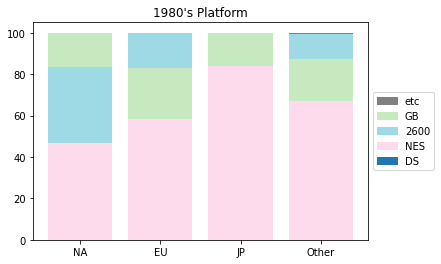

In [63]:
# 최종 명령
draw_graph(divider(df_1980), "1980's Platform")

4-3) 연도별 Platform type 점유율

In [64]:
# value_per(df_1980, 'NA_Sales')
def value_per(value9, value10):
  return list((list(value9.groupby('type')[value10].sum()) / value9.groupby('type')[value10].sum().sum()) * 100)

# 그래프 y값
# value8 : value_y(value_per(연도, 국가) ex) value_y(value_per(df_1980, 'NA_Sales'))
def value_y(value8):
  b = list(value8)
  return [100, 100-b[2], 100-(b[2] + b[1])]

# 그래프 라벨
# value_label(연도, '국가') ex) value_label(df_1980, 'Na_Sales')
def value_label(value11, value12):
  c = list(value11.groupby('type')[value12].sum().keys()) + ['etc']
  return c[::-1]

In [65]:
# 연도별 type 점유율 그래프.
# type_graph(연도, '제목') ex) type_graph(df_1980, '1980"s type')
def type_graph(value13, value14):

  fig, ax = plt.subplots()
  color = ['cadetblue','burlywood','plum']
  ax.bar('NA', value_y(value_per(value13, 'NA_Sales')), label = value_label(value13, 'NA_Sales'), color = color, width = 0.7)
  ax.bar('EU', value_y(value_per(value13, 'EU_Sales')), label = value_label(value13, 'EU_Sales'), color = color,width = 0.7)
  ax.bar('JP', value_y(value_per(value13, 'JP_Sales')), label = value_label(value13, 'JP_Sales'), color = color,width = 0.7)
  ax.bar('Other', value_y(value_per(value13, 'Other_Sales')), label = value_label(value13, 'Other_Sales'), color = color,width = 0.7)
  handles = []
  labels = ['video','portable','pc']
  for i in range(len(color)):
        handles.append(mpatches.Patch(color=color[i], label=labels[i]))
  ax.set_title(value14)
  ax.legend(handles=handles, loc='center left', bbox_to_anchor=(0.5, -0.2));

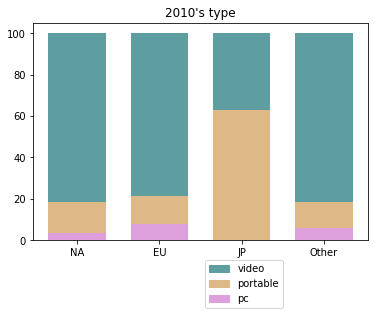

In [66]:
# 최종 명령.
type_graph(df_2010, "2010's type")

4-4) PC 게임 Genre별 점유율

In [67]:
# pc게임만 할것이기 때문에 따로 저장.
df_pc = df[df.type == 'pc']

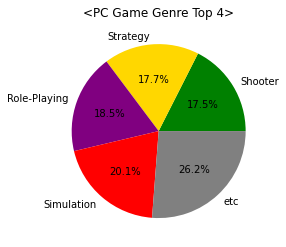

In [68]:
# 파이 그래프 그리기.
fig1, ax1 = plt.subplots()
color = ['green','gold','purple','red','gray']
ax1.pie(list(df_pc.groupby('Genre')['total'].sum().sort_values())[-4:] 
        + [sum(list(df_pc.groupby('Genre')['total'].sum().sort_values())[:-4])]
        ,labels = list(df_pc.groupby('Genre')['total'].sum().sort_values().keys()[-4:]) + ['etc']
        ,colors = color,autopct='%.1f%%')
ax1.set_title('<PC Game Genre Top 4>');